# Kaggle Home Credit Default Risk - POS_CASH_balance Exploration

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, iqr

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
app_train = pd.read_csv('../data/application_train.csv')
print('application_train data shape: ', app_train.shape)

# Testing data features
app_test = pd.read_csv('../data/application_test.csv')
print('Testing data shape: ', app_test.shape)

application_train data shape:  (307511, 122)
Testing data shape:  (48744, 121)


In [2]:
pos_cash_balance = pd.read_csv('../data/POS_CASH_balance.csv')
print('POS_CASH_balance data shape: ', pos_cash_balance.shape)

POS_CASH_balance data shape:  (10001358, 8)


In [ ]:
app_train.head()

In [8]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [10]:
pos_cash_balance[(pos_cash_balance['SK_ID_CURR'] == 100007) & (pos_cash_balance['SK_ID_PREV'] == 2001242)]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1062048,2001242,100007,-20,17.0,9.0,Active,0,0
1690801,2001242,100007,-14,17.0,3.0,Active,0,0
1694281,2001242,100007,-11,17.0,0.0,Completed,0,0
1849944,2001242,100007,-23,18.0,13.0,Active,0,0
2196414,2001242,100007,-12,17.0,1.0,Active,0,0
2354383,2001242,100007,-17,17.0,6.0,Active,0,0
2746630,2001242,100007,-24,18.0,14.0,Active,0,0
2800422,2001242,100007,-18,17.0,7.0,Active,0,0
2888418,2001242,100007,-13,17.0,2.0,Active,0,0
3552180,2001242,100007,-19,17.0,8.0,Active,0,0


In [11]:
pos_cash_balance[pos_cash_balance['SK_DPD'] > 100]['SK_DPD'].astype(int).plot.hist();

In [12]:
pos_cash_balance['SK_DPD_DEF'].describe()

count    1.000136e+07
mean     6.544684e-01
std      3.276249e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.595000e+03
Name: SK_DPD_DEF, dtype: float64

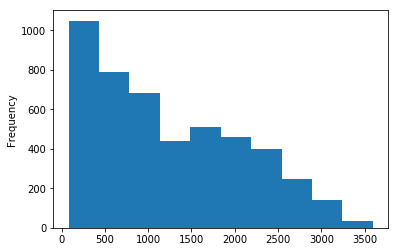

In [13]:
pos_cash_balance[pos_cash_balance['SK_DPD_DEF'] > 80]['SK_DPD_DEF'].astype(int).plot.hist();

In [ ]:
%%time
pos_cash_balance = pd.get_dummies(pos_cash_balance)

def nn_ratio(x):
    s = x.sum()
    c = x[x > 0]
    return s / c if c > 0 else 0


aggregation_strategy = {
    'MONTHS_BALANCE': [np.min, np.max, np.mean, np.sum, 'median', 'count', 'var', np.std, skew, kurtosis, iqr], 
    'CNT_INSTALMENT': [np.min, np.max, np.mean, 'median', 'var', np.std, skew, kurtosis, iqr],
    'CNT_INSTALMENT_FUTURE': [np.min, np.max, np.mean, 'median', 'var', np.std, skew, kurtosis, iqr],
    'SK_DPD': [np.min, np.max, np.mean, 'median', 'var', np.std, skew, kurtosis, iqr],
    'SK_DPD_DEF': [np.min, np.max, np.mean, 'median', 'var', np.std, skew, kurtosis, iqr],
    'SK_ID_PREV': ['nunique'],
    'NAME_CONTRACT_STATUS_Active': [np.sum, nn_ratio],
    'NAME_CONTRACT_STATUS_Amortized debt': [np.sum, nn_ratio],
    'NAME_CONTRACT_STATUS_Approved': [np.sum, nn_ratio],
    'NAME_CONTRACT_STATUS_Canceled': [np.sum, nn_ratio],
    'NAME_CONTRACT_STATUS_Completed': [np.sum, nn_ratio],
    'NAME_CONTRACT_STATUS_Demand': [np.sum, nn_ratio],
    'NAME_CONTRACT_STATUS_Returned to the store': [np.sum, nn_ratio],
    'NAME_CONTRACT_STATUS_Signed': [np.sum, nn_ratio],
    'NAME_CONTRACT_STATUS_XNA': [np.sum, nn_ratio]
    }


pos_cash_balance_agg = pos_cash_balance.groupby(['SK_ID_CURR'], as_index=False).agg(aggregation_strategy)

pos_cash_balance_agg.columns = [col[0] + "_" + col[1] for col in pos_cash_balance_agg.columns]
pos_cash_balance_agg.rename(columns={'SK_ID_CURR_':'SK_ID_CURR'}, inplace=True)
pos_cash_balance_agg.head()

In [ ]:
month_col = []
for col in pos_cash_balance_agg.columns:
    if 'MONTHS_BALANCE' in col:
        month_col.append(col)
        
pos_cash_balance_agg[month_col].head()

In [ ]:
status_col = []
for col in pos_cash_balance_agg.columns:
    if 'NAME_CONTRACT_STATUS' in col:
        status_col.append(col)
        
pos_cash_balance_agg[status_col].head()

In [16]:
pos_cash_balance_agg[(pos_cash_balance_agg['SK_ID_CURR'] == 100007)][['SK_ID_CURR', 'SK_ID_PREV_nunique']]

,SK_ID_CURR,SK_ID_PREV_nunique
6,100007,5


In [17]:
print(app_train.shape)
print(pos_cash_balance_agg.shape)
train_pos = app_train.merge(pos_cash_balance_agg, on='SK_ID_CURR', how='left')
print(train_pos.shape)

(307511, 122)
(337252, 47)
(307511, 168)


### Data Load Balancing

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.preprocessing import Imputer

In [19]:
%%time
y = app_train['TARGET']
X = app_train.drop(columns=['SK_ID_CURR', 'TARGET'])

print('Original dataset shape {}'.format(Counter(y)))


imputer = Imputer(strategy='median')
X = pd.get_dummies(X)
X = imputer.fit_transform(X)
# X = csr_matrix(X)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)

print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 282686, 1: 24825})
Resampled dataset shape Counter({1: 282686, 0: 282686})
Wall time: 48.2 s


### Argument to a function

In [20]:
from functools import partial

def foo(params, data):
    return params, data

goo = partial(foo, data=[1,2,3])

print(goo('ala'))

('ala', [1, 2, 3])
